In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split


In [2]:
class LogisticRegression:
    
    def __init__(self, lr=0.001, n_iters = 1000):
        self.lr = lr
        self.n_iters = n_iters
        self.weights = None
        self.bias = None
    def fit(self, x,y):
        
        n_samples, n_features = x.shape
        self.weights = np.zeros(n_features)
        self.bias = 0
        
        for _ in range(self.n_iters):
            linear_model = np.dot(x, self.weights) + self.bias
            y_predicted = self._sigmoid(linear_model)
            
            dw = (1/n_samples) * np.dot(x.T,(y_predicted - y))
            db = (1/n_samples) * np.sum(y_predicted - y)
            
            self.weights -= self.lr * dw
            self.bias -= self.lr * db
            
            
    def predict(self,x):
        linear_model = np.dot(x, self.weights) + self.bias
        y_predicted = self._sigmoid(linear_model)
        y_predicted_cls = [1 if i> 0.5 else 0 for i in y_predicted]
        return y_predicted_cls
        
        
    def _sigmoid(self,x):
        return 1/(1 + np.exp(-x))
        
    

In [3]:
df = pd.read_csv("desktop/credits.csv")
df.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default.payment.next.month
0,1,20000.0,2,2,1,24,2,2,-1,-1,...,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1
1,2,120000.0,2,2,2,26,-1,2,0,0,...,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1
2,3,90000.0,2,2,2,34,0,0,0,0,...,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0
3,4,50000.0,2,2,1,37,0,0,0,0,...,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0
4,5,50000.0,1,2,1,57,-1,0,-1,0,...,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 25 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   ID                          30000 non-null  int64  
 1   LIMIT_BAL                   30000 non-null  float64
 2   SEX                         30000 non-null  int64  
 3   EDUCATION                   30000 non-null  int64  
 4   MARRIAGE                    30000 non-null  int64  
 5   AGE                         30000 non-null  int64  
 6   PAY_0                       30000 non-null  int64  
 7   PAY_2                       30000 non-null  int64  
 8   PAY_3                       30000 non-null  int64  
 9   PAY_4                       30000 non-null  int64  
 10  PAY_5                       30000 non-null  int64  
 11  PAY_6                       30000 non-null  int64  
 12  BILL_AMT1                   30000 non-null  float64
 13  BILL_AMT2                   300

In [5]:
df.rename(columns={'default.payment.next.month':'left'}, inplace=True)
df.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,left
0,1,20000.0,2,2,1,24,2,2,-1,-1,...,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1
1,2,120000.0,2,2,2,26,-1,2,0,0,...,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1
2,3,90000.0,2,2,2,34,0,0,0,0,...,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0
3,4,50000.0,2,2,1,37,0,0,0,0,...,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0
4,5,50000.0,1,2,1,57,-1,0,-1,0,...,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0


In [6]:
left = df[df.left==1]
left.shape

(6636, 25)

In [7]:
retained = df[df.left==0]
retained.shape

(23364, 25)

In [8]:
df.groupby('left').mean()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6
left,,,,,,,,,,,,,,,,,,,,,
0,15064.893982,178099.726074,1.614150,1.841337,1.558637,35.417266,-0.211222,-0.301917,-0.316256,-0.355633,...,47533.365605,43611.165254,40530.445343,39042.268704,6307.337357,6640.465074,5753.496833,5300.529319,5248.220296,5719.371769
1,14773.781947,130109.656420,1.567058,1.894665,1.528029,35.725738,0.668174,0.458258,0.362116,0.254521,...,45181.598855,42036.950573,39540.190476,38271.435503,3397.044153,3388.649638,3367.351567,3155.626733,3219.139542,3441.482068


<AxesSubplot:xlabel='EDUCATION'>

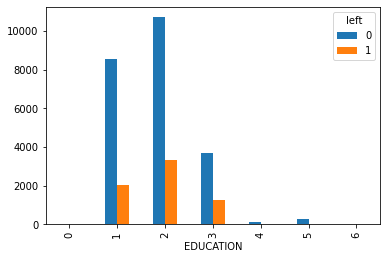

In [9]:
pd.crosstab(df.EDUCATION,df.left).plot(kind='bar')

<AxesSubplot:xlabel='MARRIAGE'>

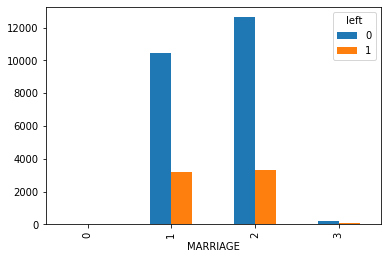

In [10]:
pd.crosstab(df.MARRIAGE,df.left).plot(kind='bar')

<AxesSubplot:xlabel='SEX'>

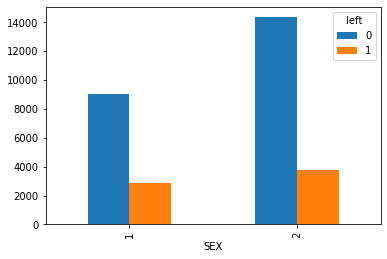

In [11]:
pd.crosstab(df.SEX,df.left).plot(kind='bar')

In [12]:
subdf = df.drop('left',axis=1)
subdf = df.drop('ID',axis=1)
subdf.head()

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,left
0,20000.0,2,2,1,24,2,2,-1,-1,-2,...,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1
1,120000.0,2,2,2,26,-1,2,0,0,0,...,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1
2,90000.0,2,2,2,34,0,0,0,0,0,...,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0
3,50000.0,2,2,1,37,0,0,0,0,0,...,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0
4,50000.0,1,2,1,57,-1,0,-1,0,0,...,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0


In [13]:
edu_dummies = pd.get_dummies(subdf.EDUCATION, prefix="edu")

In [14]:
marr_dummies = pd.get_dummies(subdf.MARRIAGE, prefix="marr")

In [15]:
df_with_dummies = pd.concat([subdf,marr_dummies,edu_dummies],axis='columns')
df_with_dummies.head()

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,...,marr_1,marr_2,marr_3,edu_0,edu_1,edu_2,edu_3,edu_4,edu_5,edu_6
0,20000.0,2,2,1,24,2,2,-1,-1,-2,...,1,0,0,0,0,1,0,0,0,0
1,120000.0,2,2,2,26,-1,2,0,0,0,...,0,1,0,0,0,1,0,0,0,0
2,90000.0,2,2,2,34,0,0,0,0,0,...,0,1,0,0,0,1,0,0,0,0
3,50000.0,2,2,1,37,0,0,0,0,0,...,1,0,0,0,0,1,0,0,0,0
4,50000.0,1,2,1,57,-1,0,-1,0,0,...,1,0,0,0,0,1,0,0,0,0


In [16]:
df_with_dummies.drop('EDUCATION',axis='columns',inplace=True)
df_with_dummies.head()

,LIMIT_BAL,SEX,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,...,marr_1,marr_2,marr_3,edu_0,edu_1,edu_2,edu_3,edu_4,edu_5,edu_6
0,20000.0,2,1,24,2,2,-1,-1,-2,-2,...,1,0,0,0,0,1,0,0,0,0
1,120000.0,2,2,26,-1,2,0,0,0,2,...,0,1,0,0,0,1,0,0,0,0
2,90000.0,2,2,34,0,0,0,0,0,0,...,0,1,0,0,0,1,0,0,0,0
3,50000.0,2,1,37,0,0,0,0,0,0,...,1,0,0,0,0,1,0,0,0,0
4,50000.0,1,1,57,-1,0,-1,0,0,0,...,1,0,0,0,0,1,0,0,0,0


In [17]:
df_with_dummies.drop('MARRIAGE',axis='columns',inplace=True)
df_with_dummies.head()

,LIMIT_BAL,SEX,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,...,marr_1,marr_2,marr_3,edu_0,edu_1,edu_2,edu_3,edu_4,edu_5,edu_6
0,20000.0,2,24,2,2,-1,-1,-2,-2,3913.0,...,1,0,0,0,0,1,0,0,0,0
1,120000.0,2,26,-1,2,0,0,0,2,2682.0,...,0,1,0,0,0,1,0,0,0,0
2,90000.0,2,34,0,0,0,0,0,0,29239.0,...,0,1,0,0,0,1,0,0,0,0
3,50000.0,2,37,0,0,0,0,0,0,46990.0,...,1,0,0,0,0,1,0,0,0,0
4,50000.0,1,57,-1,0,-1,0,0,0,8617.0,...,1,0,0,0,0,1,0,0,0,0


In [18]:
x = df_with_dummies
x.head()

,LIMIT_BAL,SEX,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,...,marr_1,marr_2,marr_3,edu_0,edu_1,edu_2,edu_3,edu_4,edu_5,edu_6
0,20000.0,2,24,2,2,-1,-1,-2,-2,3913.0,...,1,0,0,0,0,1,0,0,0,0
1,120000.0,2,26,-1,2,0,0,0,2,2682.0,...,0,1,0,0,0,1,0,0,0,0
2,90000.0,2,34,0,0,0,0,0,0,29239.0,...,0,1,0,0,0,1,0,0,0,0
3,50000.0,2,37,0,0,0,0,0,0,46990.0,...,1,0,0,0,0,1,0,0,0,0
4,50000.0,1,57,-1,0,-1,0,0,0,8617.0,...,1,0,0,0,0,1,0,0,0,0


In [19]:
y = df.left
y.head()

0    1
1    1
2    0
3    0
4    0
Name: left, dtype: int64

In [21]:
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size = 0.2, random_state = 1234)

def accuracy(y_true, y_pred):
    accuracy = np.sum(y_true == y_pred) / len(y_true)
    return accuracy

regressor = LogisticRegression(lr = 0.0001, n_iters = 1000)
regressor.fit(x_train,y_train)
predictions = regressor.predict(x_test)

C:\Users\Hp\AppData\Local\Temp/ipykernel_10288/3952905959.py:33: RuntimeWarning: overflow encountered in exp
  return 1/(1 + np.exp(-x))
